In [2]:
# import the required liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os
import seaborn as sns
from matplotlib import style
style.use('ggplot')

In [3]:
ef=pd.ExcelFile('dataset.xlsx')
exist = ef.parse('Existing employees')
left = ef.parse('Employees who have left')
exist.head()


,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [4]:
exist.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [5]:
#preprocessing
left['promotion_last_5years'] = left['promotion_last_5years'].apply(lambda x: "Yes" if x==1 else "No")
exist['promotion_last_5years'] = exist['promotion_last_5years'].apply(lambda x: "Yes" if x==1 else "No")
left['Work_accident'] = left['Work_accident'].apply(lambda x: "Yes" if x==1 else "No")
exist['Work_accident'] = exist['Work_accident'].apply(lambda x: "Yes" if x==1 else "No")

Text(17.5, 0.5, 'Frequency')

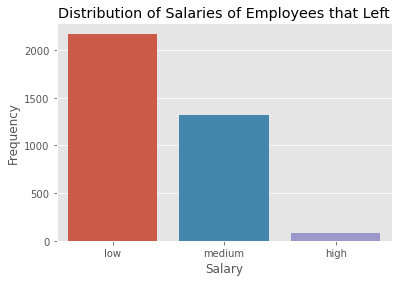

In [6]:

#let us first see what the salary distribution looks like of the employees who left
plt.figure(figsize=(10,7))
sns.countplot(left['salary'])
plt.title('Distribution of Salaries of Employees that Left').get_figure().savefig('salary distribution1.png')
plt.xlabel("Salary")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

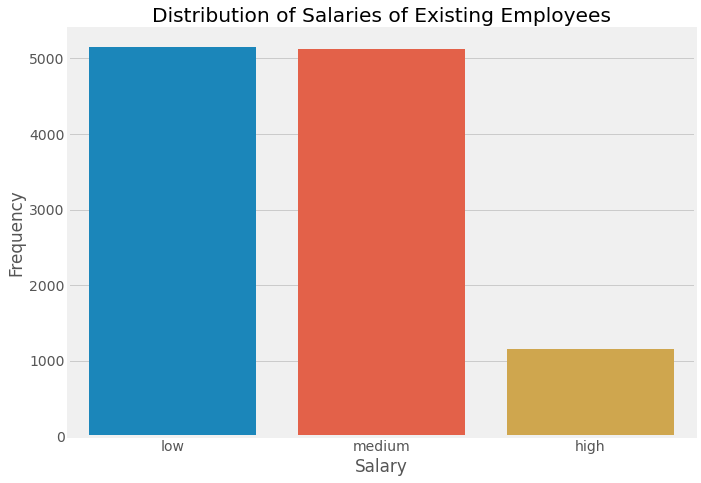

In [17]:
#we acquire the same count plot for existing employees
plt.figure(figsize=(10,7))
plt.style.use('fivethirtyeight')
sns.countplot(exist['salary'])
plt.title("Distribution of Salaries of Existing Employees")
plt.xlabel("Salary")
plt.ylabel("Frequency")


NameError: name 'number_project' is not defined

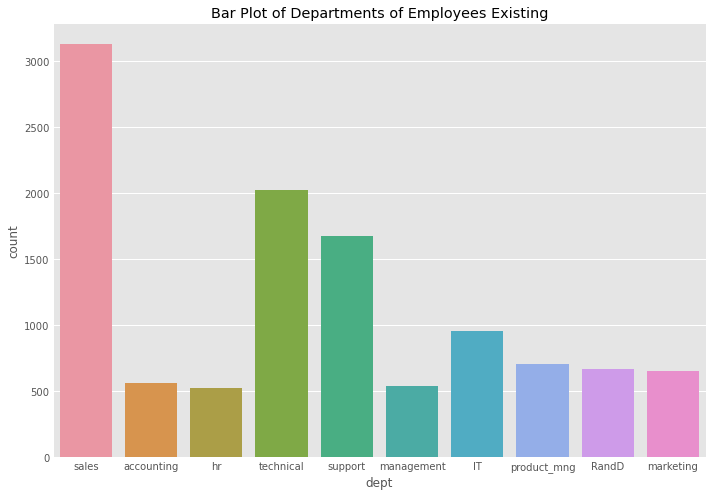

In [16]:
#department wise no of employees working
plt.style.use('fivethirtyeight')
style.use('ggplot')
plt.figure(figsize=(10,7))
sns.countplot(exist['dept']).get_figure().savefig('deptwinse1')
plt.title("Bar Plot of Departments of Employees Existing")
plt.tight_layout()


Text(0.5, 1.0, 'Bar Plot of Departments of Employees that left')

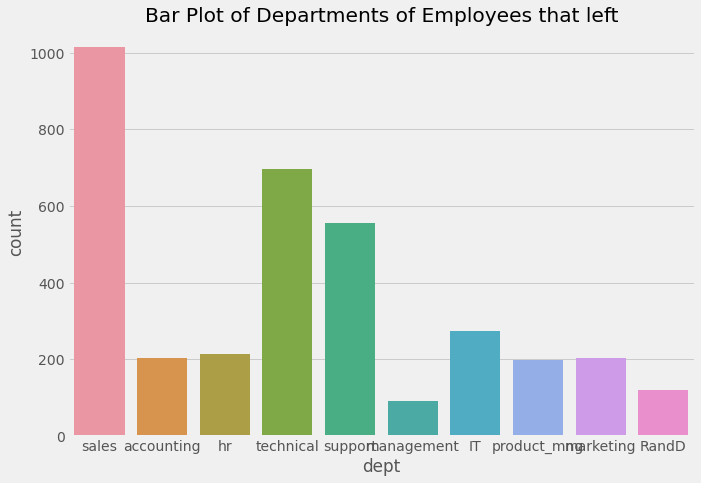

In [18]:
#department wise no of employees left
 
plt.figure(figsize=(10,7))
sns.countplot(left['dept'])
plt.title("Bar Plot of Departments of Employees that left")

In [23]:
df1=exist.pivot_table(index='dept',values='Emp ID',aggfunc='count')
print(df1)

             Emp ID
dept               
IT              954
RandD           666
accounting      563
hr              524
management      539
marketing       655
product_mng     704
sales          3126
support        1674
technical      2023


In [24]:
df2=left.pivot_table(index='dept',values='Emp ID',aggfunc='count')
print(df2)

             Emp ID
dept               
IT              273
RandD           121
accounting      204
hr              215
management       91
marketing       203
product_mng     198
sales          1014
support         555
technical       697


In [31]:
df3=((df1-df2)/df1)*100
print(percentage_of_people_left)

                Emp ID
dept                  
IT           71.383648
RandD        81.831832
accounting   63.765542
hr           58.969466
management   83.116883
marketing    69.007634
product_mng  71.875000
sales        67.562380
support      66.845878
technical    65.546218


In [29]:
# here we can see that maximum no of people have left from the management and it  department 
#this might be fixed by interacting with the employees and finding out if there are admininstation issues.
#ofcourse there is a work culture difference in each of the department but there are some common good practices that all the 
#departments must follow. we can hold  an all department meeting where we can trace the good practices in all the departments.

Text(27.85, 0.5, 'Satisfaction Level')

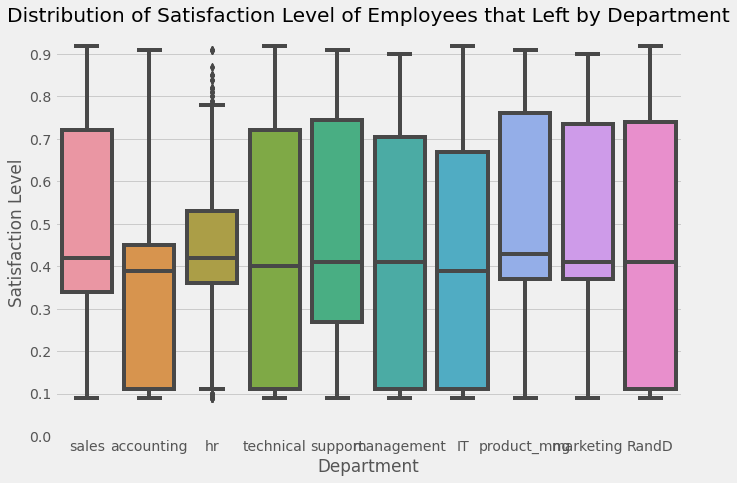

In [39]:
#from the data set we have observed that employees satisfaction level largely effects the people leaving the company
plt.figure(figsize=(10,7))
sns.boxplot(x='dept',y='satisfaction_level',data=left).get_figure().savefig('boxplot.png')
plt.yticks(np.arange(0, 1, step=0.1))
plt.title("Distribution of Satisfaction Level of Employees that Left by Department")
plt.xlabel('Department')
plt.ylabel("Satisfaction Level")

In [40]:
exist.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000
mean,7812.340742,0.666810,0.715473,3.786664,199.060203,3.380032
std,3453.947461,0.217104,0.162005,0.979884,45.682731,1.562348
min,2001.000000,0.120000,0.360000,2.000000,96.000000,2.000000
25%,4857.750000,0.540000,0.580000,3.000000,162.000000,2.000000
50%,7714.500000,0.690000,0.710000,4.000000,198.000000,3.000000
75%,10571.250000,0.840000,0.850000,4.000000,238.000000,4.000000
max,14211.000000,1.000000,1.000000,6.000000,287.000000,10.000000


In [41]:
left.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000
mean,6500.439653,0.440098,0.718113,3.855503,207.419210,3.876505
std,6266.484705,0.263933,0.197673,1.818165,61.202825,0.977698
min,1.000000,0.090000,0.450000,2.000000,126.000000,2.000000
25%,893.500000,0.130000,0.520000,2.000000,146.000000,3.000000
50%,1786.000000,0.410000,0.790000,4.000000,224.000000,4.000000
75%,12678.500000,0.730000,0.900000,6.000000,262.000000,5.000000
max,14999.000000,0.920000,1.000000,7.000000,310.000000,6.000000


In [42]:
#we have to work on the avrage satisfaction level on the employees

Text(0.5, 1.0, 'Satisfaction Level base on Salary of Employees that left')

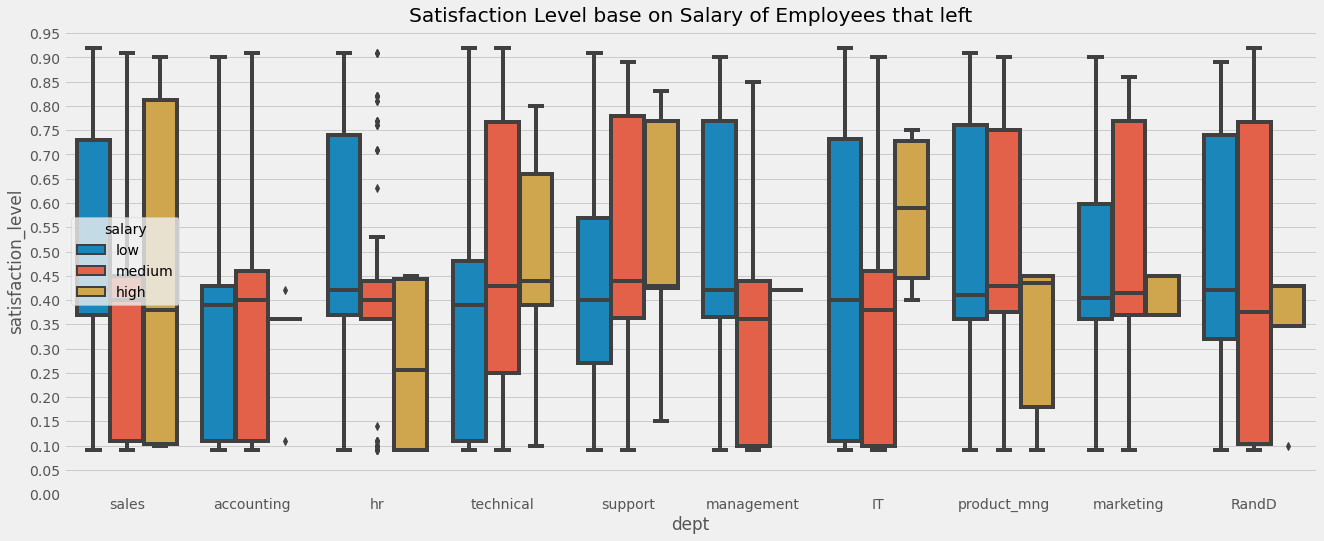

In [46]:
plt.figure(figsize=(20,8))
sns.boxplot(x='dept',y='satisfaction_level',hue='salary',data=left)
plt.yticks(np.arange(0, 1, step=0.05))
plt.title("Satisfaction Level base on Salary of Employees that left")

 

Text(0, 0.5, 'Frequency')

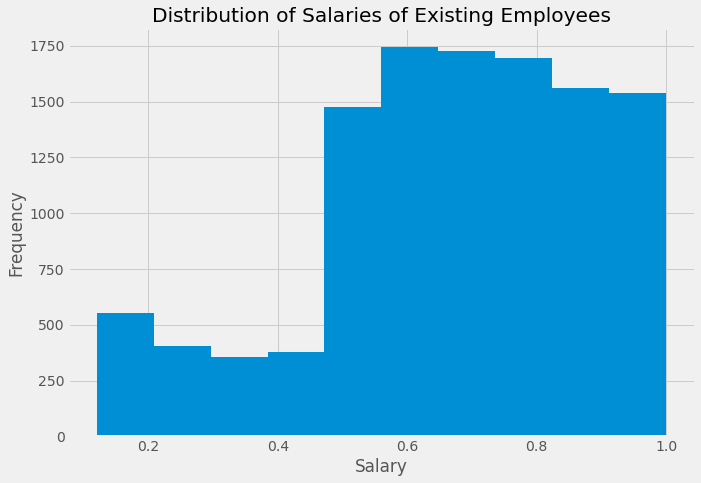

In [48]:
plt.figure(figsize=(10,7))
plt.hist(exist['satisfaction_level'])
plt.title("Distribution of Salaries of Existing Employees")
plt.xlabel("Satisfaction level")
plt.ylabel("Frequency")


Text(0, 0.5, 'Frequency')

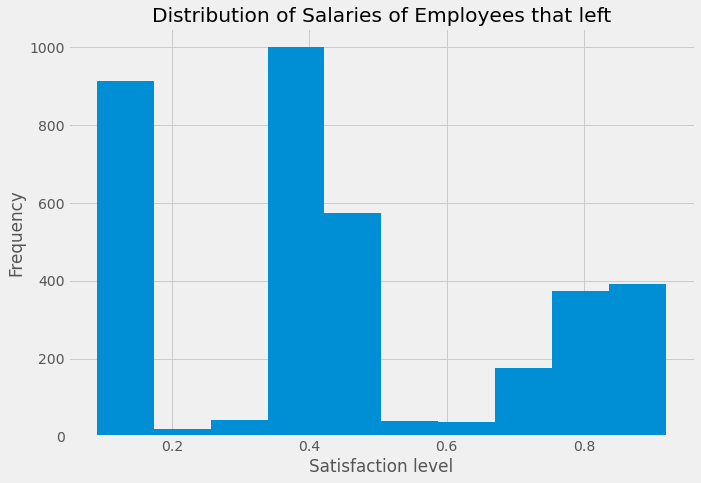

In [49]:
plt.figure(figsize=(10,7))
plt.hist(left['satisfaction_level'])
plt.title("Distribution of Salaries of Employees that left")
plt.xlabel("Satisfaction level")
plt.ylabel("Frequency")


In [51]:
# To determine the percentage of employees that left had a satisfaction level < 45
(len(left[left['satisfaction_level']<0.45])/len(left)) * 100

64.57574908989079

In [54]:
#approximately 64% of the pleople who left had < 45% of satisfaction level.
(left[left['satisfaction_level']<0.45]['promotion_last_5years'].value_counts(normalize=True))*100

No     99.566349
Yes     0.433651
Name: promotion_last_5years, dtype: float64

In [55]:
#employees that had satisfaction leve of<45% and also were not promoted in the last five years left the company


In [56]:
#to determinr how salary has effected the people who left the complamy
(left[left['satisfaction_level']<0.45]['salary'].value_counts(normalize=True))*100

low       60.754553
medium    37.120555
high       2.124892
Name: salary, dtype: float64

In [57]:
#it is true that approx. 61 % of the employees in the low salary rage left the company


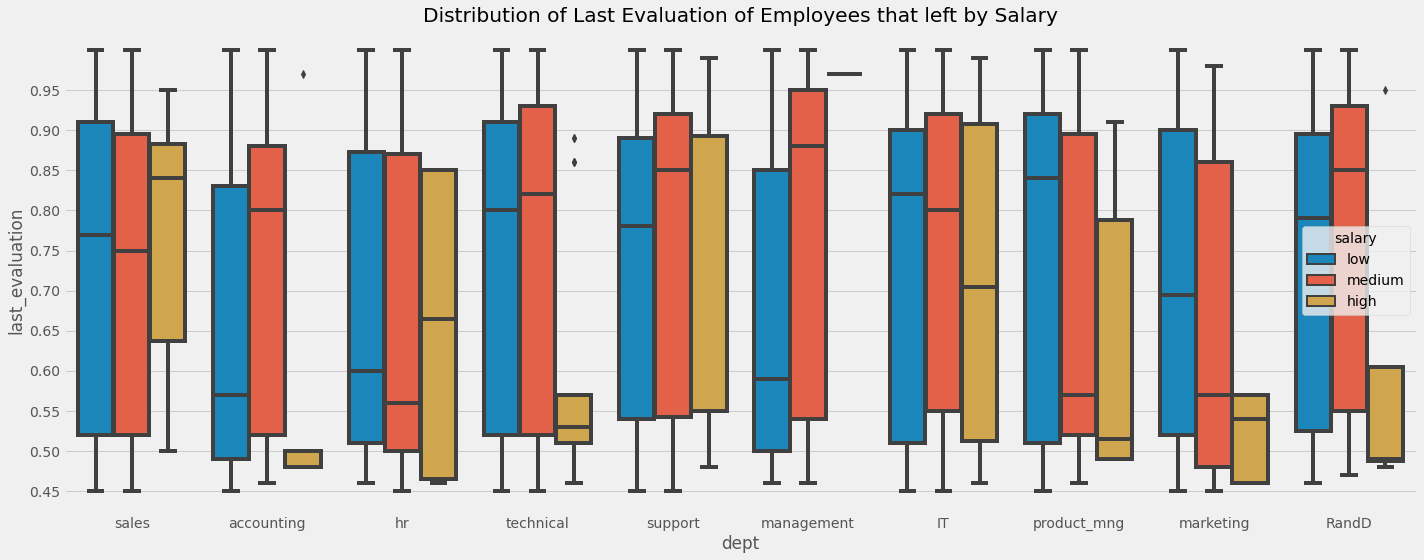

In [59]:
plt.figure(figsize=(20,8))
sns.boxplot(x='dept',y='last_evaluation',hue='salary',data=left)
plt.title("Distribution of Last Evaluation of Employees that left by Salary")
plt.yticks(np.arange(0.45, 1, step=0.05))
plt.tight_layout()

([<matplotlib.axis.YTick at 0x2ce2dc8ae20>,
 <a list of 20 Text major ticklabel objects>)

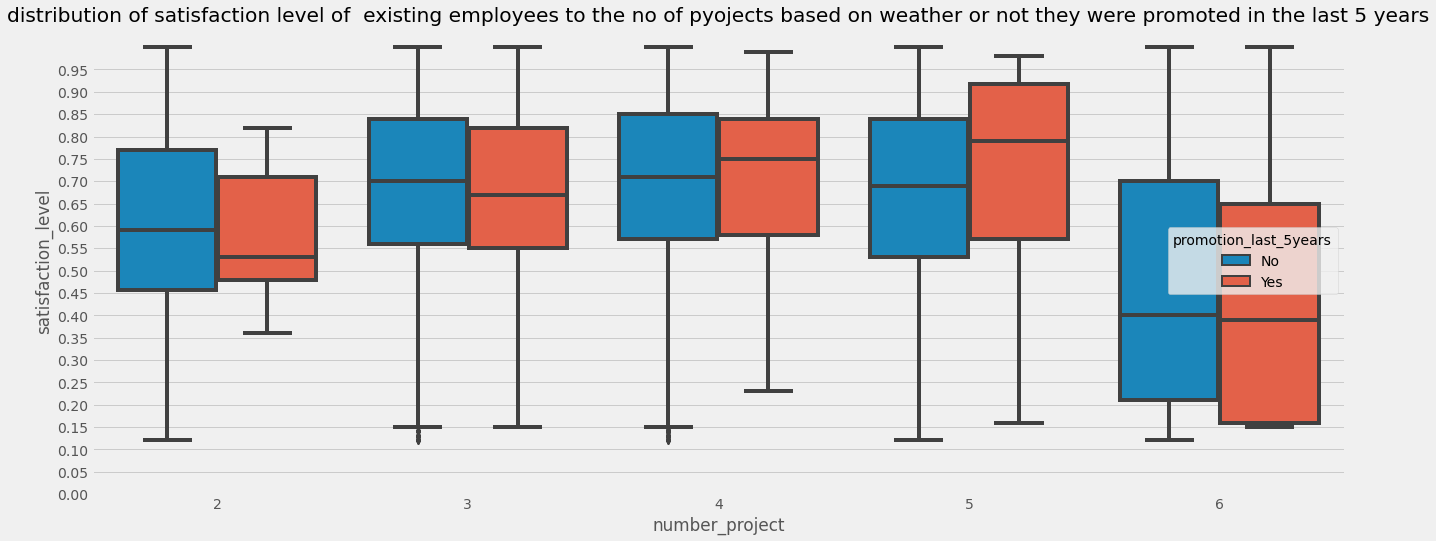

In [64]:
plt.figure(figsize=(20,8))
sns.boxplot(x='number_project',y='satisfaction_level',hue='promotion_last_5years',data=exist)
plt.title('distribution of satisfaction level of  existing employees to the no of pyojects based on weather or not they were promoted in the last 5 years')
plt.yticks(np.arange(0,1,step=0.05))


([<matplotlib.axis.YTick at 0x2ce2efe0340>,
 <a list of 20 Text major ticklabel objects>)

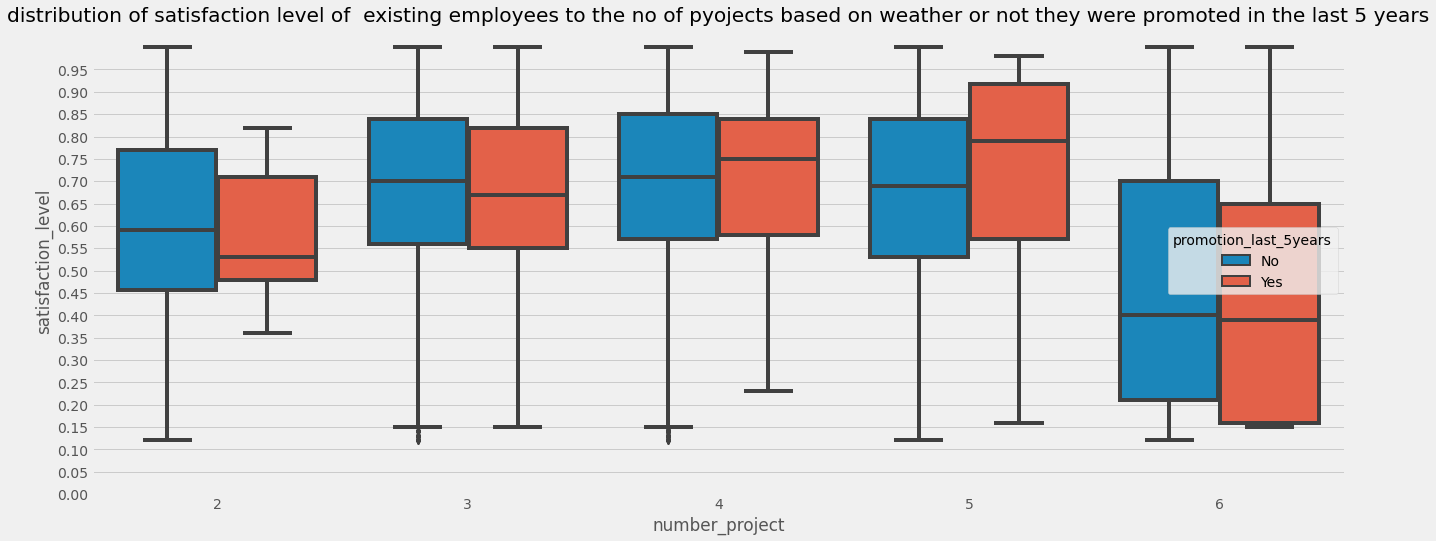

In [65]:
plt.figure(figsize=(20,8))
sns.boxplot(x='number_project',y='satisfaction_level',hue='promotion_last_5years',data=exist)
plt.title('distribution of satisfaction level of  existing employees to the no of pyojects based on weather or not they were promoted in the last 5 years')
plt.yticks(np.arange(0,1,step=0.05))
